In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# to plot the time series
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

## Read the Dataset
Change the dataset according to the desired dataset

In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv \
    -O /tmp/daily-min-temperatures.csv

--2025-04-15 10:34:29--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘/tmp/daily-min-temperatures.csv’

/tmp/daily-min-temp 100%[===================>]  66.33K  --.-KB/s    in 0.01s   

2025-04-15 10:34:29 (5.89 MB/s) - ‘/tmp/daily-min-temperatures.csv’ saved [67921/67921]



In [ ]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/AirPassengers.csv \
    -O /tmp/AirPassengers.csv

--2025-04-15 08:59:41--  https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/AirPassengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3032 (3.0K) [text/plain]
Saving to: ‘/tmp/AirPassengers.csv’

/tmp/AirPassengers. 100%[===================>]   2.96K  --.-KB/s    in 0s      

2025-04-15 08:59:41 (44.1 MB/s) - ‘/tmp/AirPassengers.csv’ saved [3032/3032]



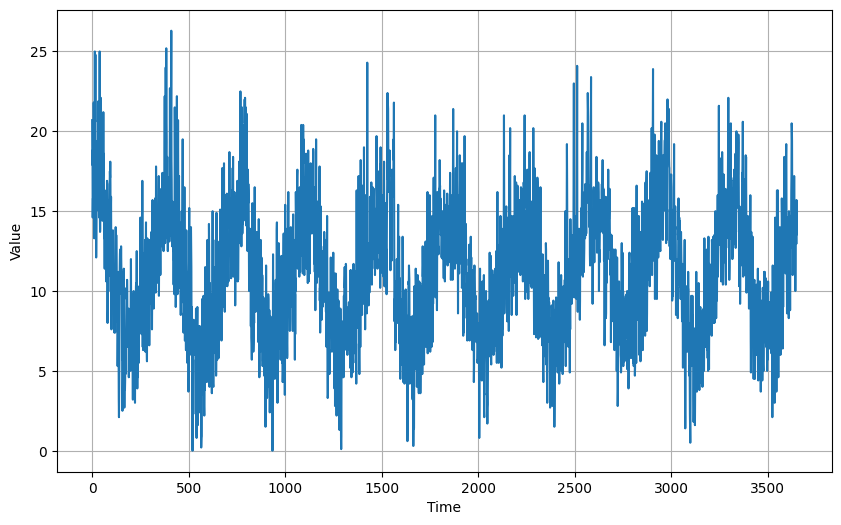

In [ ]:
import csv
time_step = []
temps = []

with open('/tmp/daily-min-temperatures.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  step=0
  for row in reader:
    temps.append(float(row[1]))
    time_step.append(step)
    step = step + 1

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

## Statistical Analysis

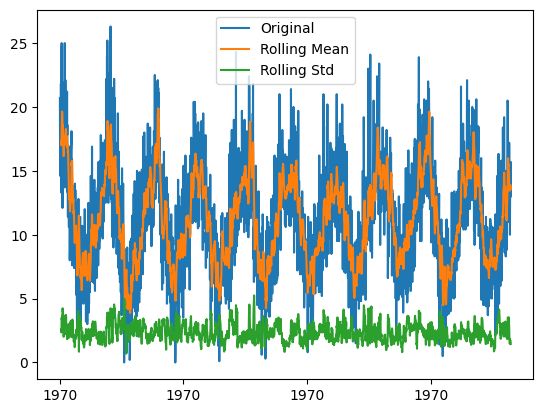

In [7]:
import pandas as pd
myseries = pd.Series(data=temps, index=pd.to_datetime(time))
myseries.name = 'temperature'  # optional: name the series
rolling_mean = myseries.rolling(window=12).mean()
rolling_std = myseries.rolling(window=12).std()
plt.plot(myseries, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.show()

## Visualize autocorrelation function values


<Figure size 1000x500 with 0 Axes>

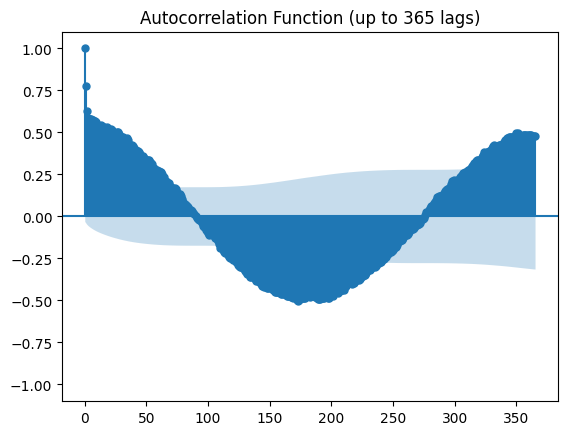

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming `series` is your time series data (a 1D array-like or pandas Series)
values = pd.DataFrame(series)

# Plot autocorrelation up to 365 lags
plt.figure(figsize=(10, 5))
plot_acf(values, lags=365)
plt.ylim(-1.1, 1.1)
plt.title('Autocorrelation Function (up to 365 lags)')
plt.show()


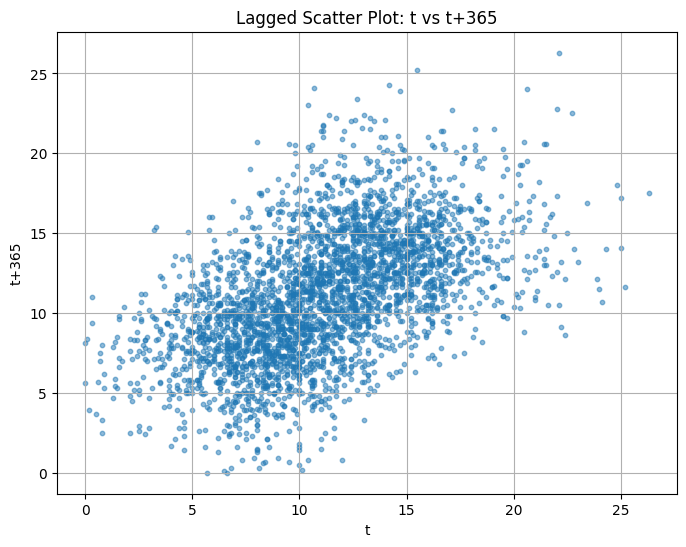

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Create lagged columns
lag = 365
values = pd.DataFrame(series)
values.columns = ['t']  # name the column explicitly
values[f't+{lag}'] = values['t'].shift(-lag)

# Drop rows with NaN caused by shifting
values_clean = values.dropna()

# Plot scatter: t vs t+365
plt.figure(figsize=(8, 6))
plt.scatter(values_clean['t'], values_clean[f't+{lag}'], alpha=0.5, s=10)
plt.xlabel('t')
plt.ylabel(f't+{lag}')
plt.title(f'Lagged Scatter Plot: t vs t+{lag}')
plt.grid(True)
plt.show()

##Time Series Lag Scatter Plots
Time series modeling assumes a relationship between an observation and the previous observation.

Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag2, and so on.

A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot.

Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.

## Seasonal Decomposition
Analyze additive model and decompose into trend and seasonal components

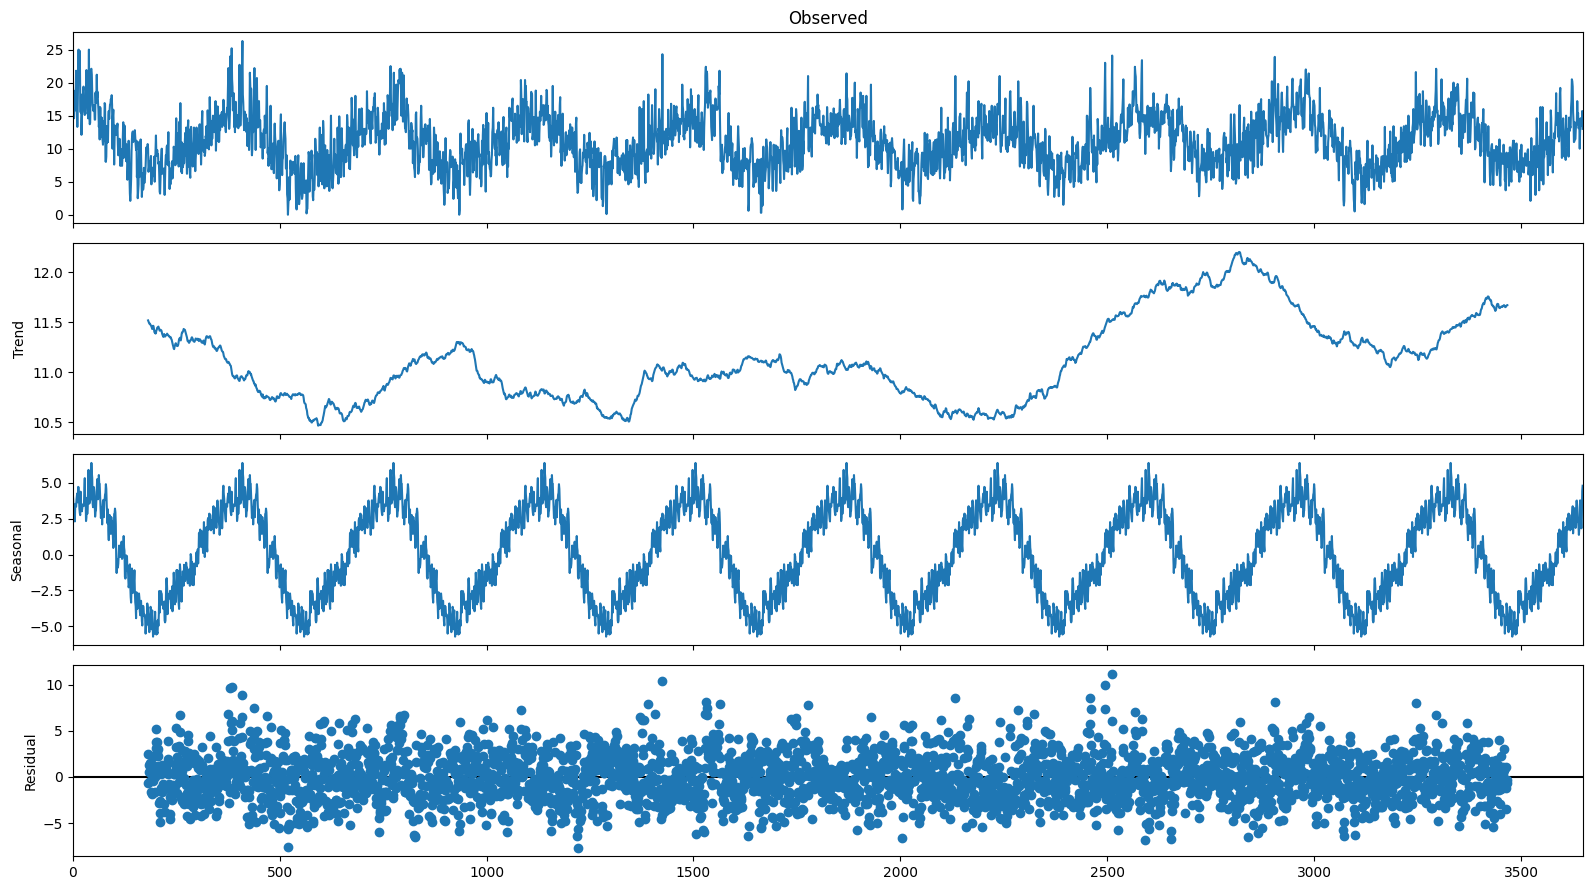

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(series, model='additive', period=365)
fig=decomp.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

## Splitting the dataset
The time series is split into training and validation sequences.

In [22]:
split_time = 2500
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

##Parameters
window_size: This variable defines the size of the 'window' or the number of consecutive data points used to predict the next point in the sequence. For example, if window_size = 30, it means that the model will use the past 30 observations to predict the 31st observation. This is crucial in time series forecasting because it determines how much historical data the model considers when making a prediction. A larger window size allows the model to learn from more data points, potentially capturing more complex patterns, but it may also slow down training and require more memory.

batch_size: In machine learning, the batch_size refers to the number of data points (or windows, in the context of time series) processed before the model's internal parameters are updated. A batch_size = 32 means that the model will take in 32 windows of data, pass them through the neural network, and then update the weights of the network all at once using the average gradient of the loss calculated over these 32 windows. The choice of batch size can affect the speed and stability of training; smaller batches can lead to faster but potentially more volatile training, while larger batches provide more stable but slower updates.

shuffle_buffer_size: This variable is used in the process of shuffling the data before feeding it into the model for training. Shuffling helps prevent the model from learning any unintended order-dependent patterns in the training data, promoting a more generalized learning. The shuffle_buffer_size = 1000 means that a buffer of 1000 data points is filled, and then data points are randomly sampled from this buffer to create a batch. This technique allows for efficient shuffling of large datasets that might not fit into memory if you were to shuffle them all at once. The size of the shuffle buffer can affect both the randomness of the shuffling and the memory usage during training.

epochs: The number of epochs used for training the model.

In [23]:
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000
epochs = 50

## The windowed_dataset function
The windowed_dataset function is designed to prepare a time series dataset for training a machine learning model. It starts by expanding the dimensions of the input series to add a new axis, making it compatible with models that expect input data in a specific shape. It then creates a dataset from the time series, and uses the window method to generate overlapping windows of data, each containing a specified number of consecutive data points (window_size + 1 to include both the input and label in the same window). These windows are then flattened into batches to ensure that each window is treated as a separate element. The dataset is shuffled to introduce randomness, which helps in reducing sequence bias during training. The map function transforms each window into a tuple of inputs and labels (the inputs are all but the last point in the window, and the labels are all but the first point), making the data suitable for supervised learning. Finally, the dataset is batched and prefetched, optimizing the training process by batching the data into specified sizes for each training step and preparing data for the next step while the current step is being executed, respectively.

In [24]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

## The model_forecast function

The model_forecast function is designed to use a trained machine learning model to make predictions on a time series dataset. It starts by creating a dataset from the input series and then uses the window method to generate overlapping windows of data, each containing a number of data points specified by window_size. These windows are intended to match the shape the model expects for its input data. The windows are then flattened into batches for processing. The dataset is batched into groups of 32 windows each (a choice that balances efficiency and memory usage) and is set up to prefetch one batch at a time to optimize the loading of data during prediction. The model.predict method is then called on this prepared dataset, allowing the model to generate forecasts for each window of input data. The function returns these forecasts, which can be used to analyze the model's performance or for further processing, such as plotting or transforming back into a time-aligned series for comparison with actual values.

In [25]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

## Defining the model
This TensorFlow model is a sequential model designed for time series forecasting, leveraging a combination of convolutional and recurrent neural network layers, followed by dense layers, to predict future values based on past observations. This model combines the feature extraction capabilities of Conv1D layers, the memory capabilities of LSTM layers, and the interpretative power of dense layers to forecast future values in a time series. The architecture is tailored for datasets where capturing both short-term patterns (using convolutions) and long-term dependencies (using LSTMs) is crucial for making accurate predictions.

In [26]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs = epochs, callbacks=[lr_schedule])


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>
(2500,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 124.7325 - mae: 125.2312 - learning_rate: 1.0000e-08
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 85.8596 - mae: 86.3593 - learning_rate: 1.1220e-08
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 48.2380 - mae: 48.7370 - learning_rate: 1.2589e-08
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 16.1023 - mae: 16.5947 - learning_rate: 1.4125e-08
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 12.5383 - mae: 13.0291 - learning_rate: 1.5849e-08
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 11.6664 - mae: 12.1565 - learning_rate: 1.7783e-08
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10.8495 - mae: 11.3384 - learning_rate: 1.9953e-08
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10.0160 - mae: 10.5043 - learning_rate: 2.2387e-08
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.1975 - mae: 9.6846 - learning_rate: 2.5119e-08
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.4114 - mae: 8.8969 - learning_rate: 2.8184e-08
Epoch 11/50
78/78 ━━━━━━━━━━━━━

## Analyze training history

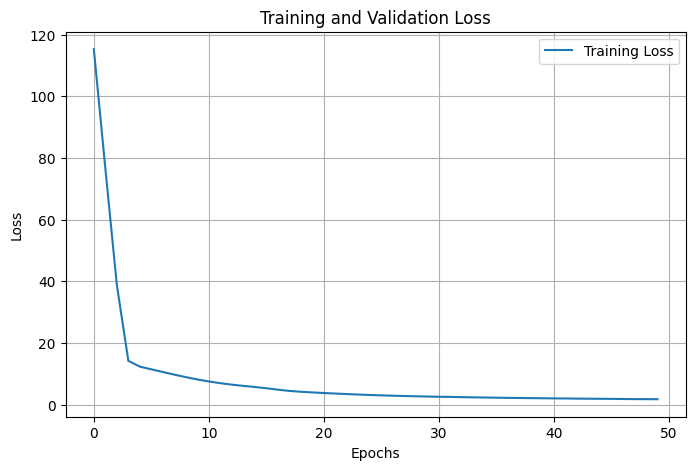

In [27]:
# Extract history data
history_dict = history.history

# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(history_dict['loss'], label='Training Loss')
if 'val_loss' in history_dict:
    plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Loss vs learning rate')

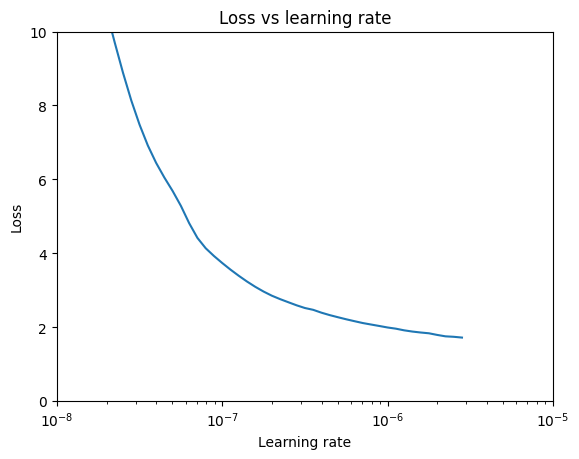

In [28]:
plt.semilogx(history.history["learning_rate"], history.history["loss"])
plt.axis([1e-8, 1e-5, 0, 10])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Loss vs learning rate')

dict_keys(['loss', 'mae', 'learning_rate'])


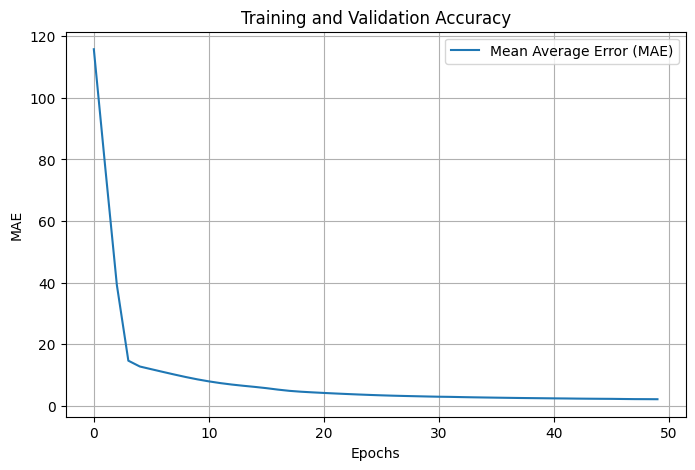

In [29]:
# Extract history data
history_dict = history.history
print(history.history.keys())
plt.figure(figsize=(8, 5))
plt.plot(history_dict['mae'], label='Mean Average Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = np.array(rnn_forecast)[split_time - window_size:-1, -1, 0]

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


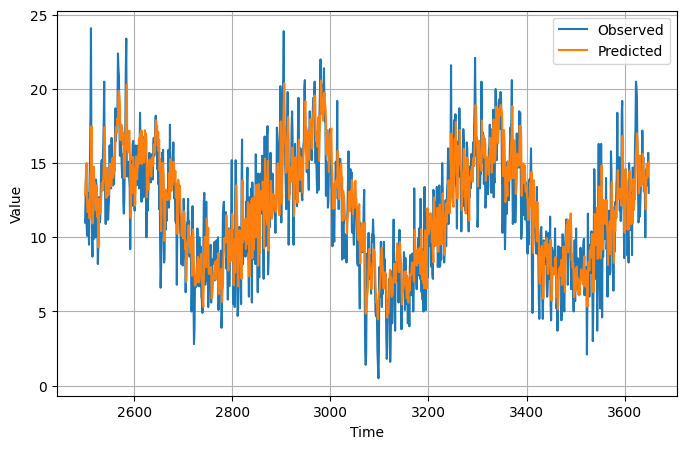

In [37]:
plt.figure(figsize=(8, 5))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
plt.legend(['Observed', 'Predicted'], loc='upper right')

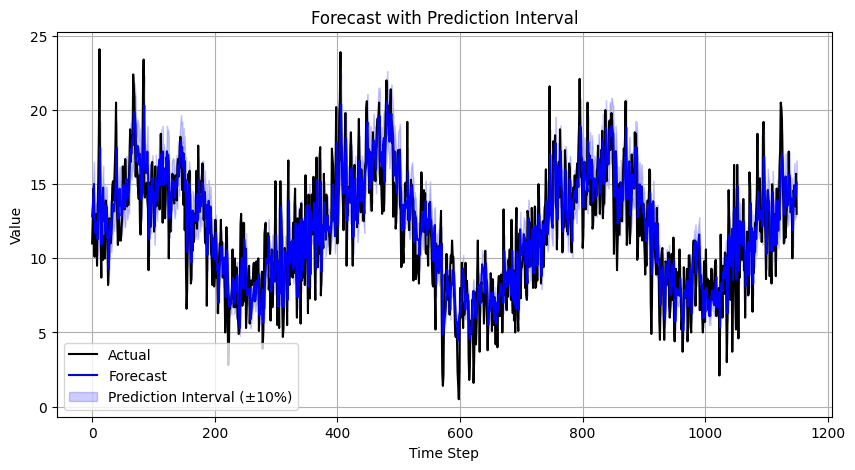

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Example: assume you have prediction + confidence intervals
# x_valid: actual values
# rnn_forecast: predicted values
# For illustration, let's assume ±10% error range

error_margin = 0.10  # 10% error band

# Compute upper and lower bounds
lower_bound = rnn_forecast * (1 - error_margin)
upper_bound = rnn_forecast * (1 + error_margin)

# Plot with shaded error band
plt.figure(figsize=(10, 5))
plt.plot(x_valid, label='Actual', color='black')
plt.plot(rnn_forecast, label='Forecast', color='blue')

# Shaded area between lower and upper bounds
plt.fill_between(range(len(rnn_forecast)), lower_bound, upper_bound,
                 color='blue', alpha=0.2, label='Prediction Interval (±10%)')

plt.title('Forecast with Prediction Interval')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Model Evaluation


### Mean Absolute Error

In [42]:
mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(x_valid, rnn_forecast)
result = mae.result().numpy()
print("MAE:", result)


MAE: 1.910681


### Mean Squared Error

In [43]:
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(x_valid, rnn_forecast)
result = mse.result().numpy()
print("MSE:", result)

MSE: 5.9530883


### Mean Average Percentage Error

In [50]:
# MAPE
mape = np.mean(np.abs((x_valid - rnn_forecast) / x_valid)) * 100

print("MAPE:", mape)

MAPE: 21.565536303867276


### Correlation

In [49]:
import numpy as np

correlation = np.corrcoef(x_valid, rnn_forecast)[0, 1]
print("Correlation:", correlation)

Correlation: 0.7956726958902273


## Visualization of Model Performance Characteristics

### Error Histogram
We can use both histograms to better understand the distribution of residual errors.

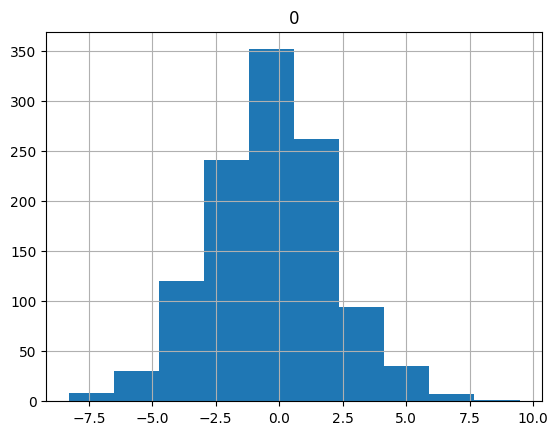

In [45]:
from matplotlib import pyplot

# calculate residuals
residuals = [x_valid[i]-rnn_forecast[i] for i in range(len(rnn_forecast))]
residuals = DataFrame(residuals)
# histogram plot
residuals.hist()
pyplot.show()

## Regression plot

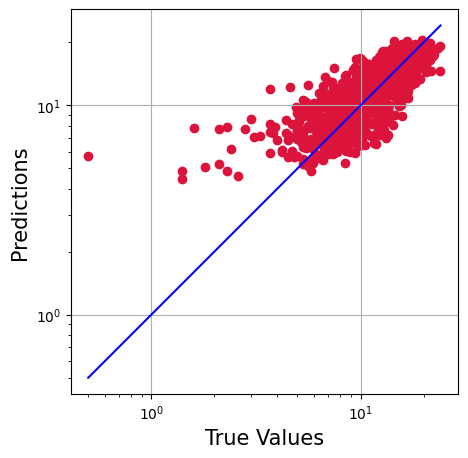

In [60]:
plt.figure(figsize=(5,5))
plt.scatter(x_valid, rnn_forecast, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(rnn_forecast), max(x_valid))
p2 = min(min(rnn_forecast), min(x_valid))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.grid(True)
plt.show()

### Taylor Diagram
A Taylor Diagram is a special type of diagram that summarizes how well a model’s output matches observations using three statistics simultaneously:
*   Correlation coefficient
*   Centered Root Mean Square Error (CRMSE)
*   Standard deviation

In [54]:
pip install skillmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 11.6 MB/s eta 0:00:00


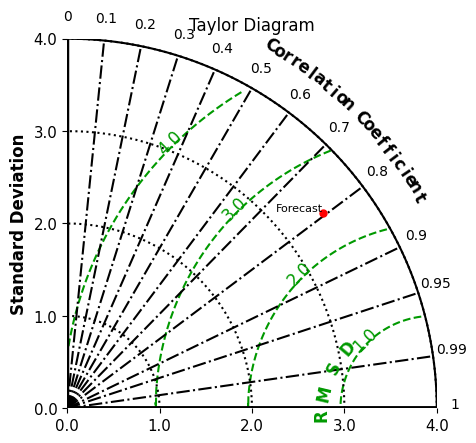

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import skill_metrics as sm

# Data: actual and forecast
x = np.array(x_valid, dtype=np.float64)
y = np.array(rnn_forecast, dtype=np.float64)

# Demean for centered RMSE
x_centered = x - np.mean(x)
y_centered = y - np.mean(y)

# Compute stats
sdev = np.array([np.std(x_centered), np.std(y_centered)], dtype=np.float64)
crmsd = np.array([0, np.sqrt(np.mean((x_centered - y_centered)**2))], dtype=np.float64)
ccoef = np.array([1, np.corrcoef(x_centered, y_centered)[0, 1]], dtype=np.float64)

# Taylor diagram
sm.taylor_diagram(
    sdev, crmsd, ccoef,
    markerLabel=['Observation', 'Forecast'],
    markerSize=10,
    colCOR='black',
    colOBS='red'  # Removed 'styleOBS'
)

plt.title('Taylor Diagram')
plt.show()

## Bland-Altman Plot
The Bland–Altman plot allows to:

* Assess the agreement between two measurements (e.g., actual vs predicted values)

* Visualize the bias and limits of agreement

* Detect systematic errors or outliers in predictions

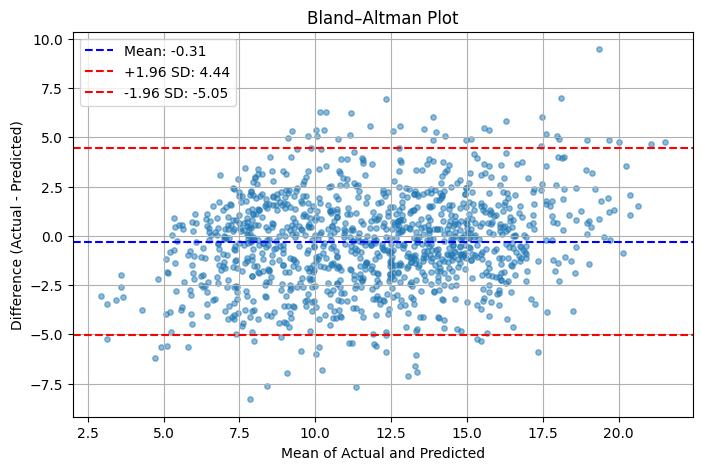

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# x_valid: actual values
# rnn_forecast: predicted values

actual = np.array(x_valid)
predicted = np.array(rnn_forecast)

# Compute averages and differences
avg = (actual + predicted) / 2
diff = actual - predicted
mean_diff = np.mean(diff)
std_diff = np.std(diff)

# Limits of agreement
upper = mean_diff + 1.96 * std_diff
lower = mean_diff - 1.96 * std_diff

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(avg, diff, alpha=0.5, s=15)
plt.axhline(mean_diff, color='blue', linestyle='--', label=f'Mean: {mean_diff:.2f}')
plt.axhline(upper, color='red', linestyle='--', label=f'+1.96 SD: {upper:.2f}')
plt.axhline(lower, color='red', linestyle='--', label=f'-1.96 SD: {lower:.2f}')

plt.title('Bland–Altman Plot')
plt.xlabel('Mean of Actual and Predicted')
plt.ylabel('Difference (Actual - Predicted)')
plt.grid(True)
plt.legend()
plt.show()